## Project Hand Sign


# Importing 

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 

In [2]:
tf.__version__

'2.4.1'

# Importing data sets

In [3]:
train_dataset = pd.read_csv("sign_mnist_train.csv")
test_dataset = pd.read_csv("sign_mnist_test.csv")

# Training and Test DataSet

**Training DataSet**

In [4]:

train_dataset.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


# Train and Test Set Extraction


In [5]:

X_train = train_dataset.iloc[:,1:]
Y_train = train_dataset.iloc[:,0]

X_test = test_dataset.iloc[:,1:]
Y_test = test_dataset.iloc[:,0]


# Normalisation


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

# Reshaping for Cov2d Input

In [7]:
X_train = np.array(X_train)
X_test = np.array(X_test)

X_train= X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)



# Training and Test Data Sets

**X Train**

In [8]:

print("X_Train-> "+str(list(X_train.shape)))
print("Y_Train-> "+str(list(Y_train.shape)))

print("X_Test->  "+str(list(X_test.shape)))
print("Y_test->  "+str(list(Y_test.shape)))

X_Train-> [27455, 28, 28, 1]
Y_Train-> [27455]
X_Test->  [7172, 28, 28, 1]
Y_test->  [7172]


# Encoding the labels

In [9]:

from keras.utils import to_categorical 
Y_train = to_categorical(Y_train, dtype ="uint8") 
Y_test = to_categorical(Y_test, dtype ="uint8")


# Data Augmentation

**Not needed because of Large number of dataset**

# CNN model

# Initialising


In [10]:
cnn = tf.keras.models.Sequential()

Convulation Layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation='relu', input_shape=[28, 28, 1]))

Pooling

In [12]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

2nd Convulation Layer

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=7, activation='relu'))

2nd Pooling


In [14]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Flatten

In [15]:
cnn.add(tf.keras.layers.Flatten())

Dropout

In [16]:
cnn.add(tf.keras.layers.Dropout(0.5))

Full Connection

In [17]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Output Layer

In [18]:
cnn.add(tf.keras.layers.Dense(units=25, activation='sigmoid'))

# Model Summary

In [19]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          100384    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

# Compiling the model

In [20]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Training the model on Training Set

In [21]:
history =cnn.fit(X_train, Y_train,validation_data=(X_test, Y_test) ,batch_size = 32, epochs = 20)

Epoch 1/20
858/858 [==============================] - 43s 50ms/step - loss: 2.7551 - accuracy: 0.1525 - val_loss: 1.6756 - val_accuracy: 0.4690
Epoch 2/20
858/858 [==============================] - 41s 47ms/step - loss: 1.8811 - accuracy: 0.3734 - val_loss: 1.3627 - val_accuracy: 0.5908
Epoch 3/20
858/858 [==============================] - 41s 48ms/step - loss: 1.5181 - accuracy: 0.4926 - val_loss: 0.9897 - val_accuracy: 0.7121
Epoch 4/20
858/858 [==============================] - 41s 48ms/step - loss: 1.2372 - accuracy: 0.5793 - val_loss: 0.8508 - val_accuracy: 0.7133
Epoch 5/20
858/858 [==============================] - 42s 49ms/step - loss: 1.0736 - accuracy: 0.6352 - val_loss: 0.6951 - val_accuracy: 0.7876
Epoch 6/20
858/858 [==============================] - 41s 48ms/step - loss: 0.9467 - accuracy: 0.6777 - val_loss: 0.6192 - val_accuracy: 0.8179
Epoch 7/20
858/858 [==============================] - 41s 48ms/step - loss: 0.8490 - accuracy: 0.7144 - val_loss: 0.5670 - val_accuracy:

# Graph for Train and Test Set

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


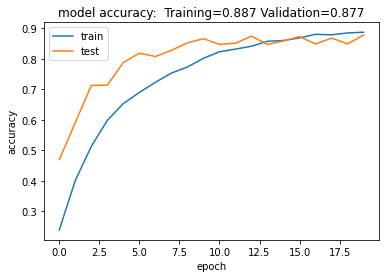

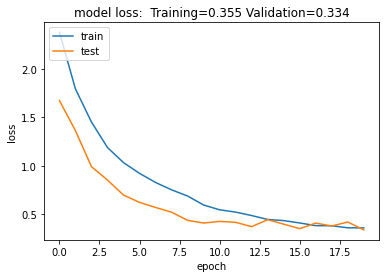

In [22]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())

#Epoch
last_epoch=20-1



# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
Title_Output_Accuracy=" Training="+str(round(history.history['accuracy'][last_epoch],3))+" Validation="+str(round(history.history['val_accuracy'][last_epoch],3));
plt.title("model accuracy: "+Title_Output_Accuracy)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
Title_Output_Loss=" Training="+str(round(history.history['loss'][last_epoch],3))+" Validation="+str(round(history.history['val_loss'][last_epoch],3));
plt.title('model loss: '+Title_Output_Loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# Accuracy per classes

In [23]:
from sklearn.metrics import classification_report
import numpy as np

Y_test = np.argmax(Y_test, axis=1) # Convert one-hot to index
Y_pred = cnn.predict_classes(X_test)
print(classification_report(Y_test, Y_pred))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       1.00      0.88      0.94       331
           1       0.95      0.82      0.88       432
           2       0.83      0.95      0.89       310
           3       0.76      0.90      0.83       245
           4       0.89      0.97      0.93       498
           5       1.00      1.00      1.00       247
           6       0.92      0.81      0.86       348
           7       0.81      0.95      0.87       436
           8       0.91      1.00      0.95       288
          10       0.94      0.61      0.74       331
          11       0.89      0.99      0.94       209
          12       0.74      0.95      0.83       394
          13       0.87      0.84      0.85       291
          14       1.00      0.63      0.77       246
          15       1.00      0.91      0.95       347
          16       0.91      0.98      0.94       164
          17       0.99      0.49      0.66       144
          18       0.90    

#Video Capture